# Week 1, Class 2: Introduction to Machine Learning in Healthcare
## Hands-on Lab: PyTorch Fundamentals & Your First Neural Network

**Course:** AI/ML in Medicine and Healthcare  
**Module:** Week 1 - Foundations  

---

## 📝 Student Information

**Student 1:**
- Name: Gustavo Barroso Souza Cruz
- Email: gustavobsc@al.insper.edu.br

**Student 2:**
- Name: _______________________
- Email: ______________________

**Date Submitted:** ______________

---

## 🎯 Learning Objectives

By the end of this lab, you will:
1. ✅ Master essential PyTorch tensor operations
2. ✅ **Build a complete neural network from scratch**
3. ✅ **Implement the full training loop** (forward, loss, backward, optimize)
4. ✅ **Evaluate with medical metrics** (sensitivity, specificity)
5. ✅ **Experiment with architectures** and hyperparameters

---

## ⏱️ Time Allocation

- **Part 1:** Tensor Operations (30 minutes)
- **Part 2:** Neural Network (60 minutes)
  - Milestones 1-5: ~50 minutes
  - Milestone 6 (Experimentation): ~30+ minutes

**Total:** 90 minutes


---

# 🚀 PART 1: Tensor Operations Speed Run (30 minutes)

## Instructions:

Complete the following challenges. If you're **experienced with PyTorch**, this should take 15-20 minutes. If you're **new to PyTorch**, take your time and ask questions!

**Format:** Each challenge is independent. Complete as many as you can.

---

In [1]:
# Import necessary libraries
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch version: 2.10.0+cu128
CUDA available: True


## Challenge 1: Create Medical Data Tensors (5 minutes)

**Task:** Create a tensor representing **100 patients** with **8 medical features** each.

Features:
1. Age (years): 20-80
2. BMI (kg/m²): 18-40
3. Blood Pressure (mmHg): 80-180
4. Glucose (mg/dL): 70-200
5. Insulin (μU/mL): 0-200
6. Pregnancies: 0-15
7. Skin Thickness (mm): 0-99
8. Diabetes Pedigree Function: 0.0-2.5

**Requirements:**
- Use realistic value ranges for each feature
- Final tensor shape: `(100, 8)`
- Data type: `float32`

In [2]:
# TODO: Create a tensor with 100 patients and 8 features
# Hint: You can use torch.randn() and scale/shift to appropriate ranges
# Or create individual feature columns and concatenate


# Your code here:
mins = torch.tensor([20, 18, 80, 70, 0, 0, 0, 0])
max = torch.tensor([80, 40, 180, 200, 200, 15, 99, 2.5])

base_tensor= torch.rand((100, 8), dtype=torch.float32)

patients_data = mins + (max - mins) * base_tensor


# Verification (don't modify)
assert patients_data is not None, "You need to create the patients_data tensor!"
assert patients_data.shape == (100, 8), f"Expected shape (100, 8), got {patients_data.shape}"
assert patients_data.dtype == torch.float32, f"Expected dtype float32, got {patients_data.dtype}"
print("✓ Challenge 1 complete!")
print(f"Tensor shape: {patients_data.shape}")
print(f"Sample patient data:\n{patients_data[0]}")

✓ Challenge 1 complete!
Tensor shape: torch.Size([100, 8])
Sample patient data:
tensor([ 72.9362,  38.1301, 118.2864, 194.7097,  78.0896,   9.0134,  25.4007,
          1.9841])


## Challenge 2: One-Hot Encoding (5 minutes)

**Task:** Convert diagnosis labels to one-hot encoded vectors.

Given: `labels = [0, 1, 1, 0, 1]` (0 = no diabetes, 1 = diabetes)

**Expected output:**
```
[[1, 0],  # Patient 0: no diabetes
 [0, 1],  # Patient 1: diabetes
 [0, 1],  # Patient 2: diabetes
 [1, 0],  # Patient 3: no diabetes
 [0, 1]]  # Patient 4: diabetes
```

**Hint:** Use `torch.nn.functional.one_hot()`

In [3]:
# Given labels
labels = torch.tensor([0, 1, 1, 0, 1])

# TODO: Convert to one-hot encoding
# Hint: import torch.nn.functional as F
#       one_hot = F.one_hot(labels, num_classes=2)

import torch.nn.functional as F
one_hot_labels = F.one_hot(labels, num_classes=2)


# Verification (don't modify)
assert one_hot_labels is not None, "You need to create one_hot_labels!"
assert one_hot_labels.shape == (5, 2), f"Expected shape (5, 2), got {one_hot_labels.shape}"
assert torch.equal(one_hot_labels[0], torch.tensor([1, 0])), "First patient encoding incorrect"
print("✓ Challenge 2 complete!")
print(f"One-hot encoded labels:\n{one_hot_labels}")

✓ Challenge 2 complete!
One-hot encoded labels:
tensor([[1, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1]])


## Challenge 3: Feature Normalization (5 minutes)

**Task:** Normalize the patient data to have **mean=0** and **standard deviation=1** for each feature.

**Formula:** `normalized = (x - mean) / std`

**Requirements:**
- Normalize each of the 8 features independently
- Use the `patients_data` tensor from Challenge 1
- Verify: mean ≈ 0, std ≈ 1 for each feature

In [4]:
# TODO: Normalize patients_data
# Hint: check numpy or pandas API for mean and stdev functions
import numpy as np

means = patients_data.mean(dim=0)
stds = patients_data.std(dim=0)

normalized_data = (patients_data - means) / stds


# Verification (don't modify)
assert normalized_data is not None, "You need to create normalized_data!"
assert normalized_data.shape == patients_data.shape, "Shape should not change"

# Check normalization
means = normalized_data.mean(dim=0)
stds = normalized_data.std(dim=0)
print("✓ Challenge 3 complete!")
print(f"Mean per feature (should be ~0): {means}")
print(f"Std per feature (should be ~1): {stds}")
assert torch.allclose(means, torch.zeros(8), atol=1e-6), "Mean should be close to 0"
assert torch.allclose(stds, torch.ones(8), atol=1e-1), "Std should be close to 1"

✓ Challenge 3 complete!
Mean per feature (should be ~0): tensor([-2.4796e-07,  1.5497e-08,  2.7061e-07, -1.5259e-07,  2.8610e-08,
         3.8743e-08,  7.1526e-09, -4.2915e-08])
Std per feature (should be ~1): tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


## Challenge 4: Batch Operations (5 minutes)

**Task:** Split 1000 patients into batches of 32 using PyTorch's DataLoader.

**Requirements:**
1. Create synthetic data for 1000 patients with 8 features
2. Create corresponding labels (0 or 1)
3. Create a `TensorDataset`
4. Create a `DataLoader` with batch_size=32, shuffle=True

In [5]:
from torch.utils.data import TensorDataset, DataLoader

# TODO: Create data for 1000 patients
mins = torch.tensor([20, 18, 80, 70, 0, 0, 0, 0])
maxs = torch.tensor([80, 40, 180, 200, 200, 15, 99, 2.5])

base_tensor= torch.rand((1000, 8), dtype=torch.float32)

X = mins + (maxs - mins) * base_tensor # Shape: (1000, 8)
rand_y = torch.rand(1000)
y = torch.tensor([1 if i > 0.5 else 0 for i in rand_y]) # Shape: (1000,)


# TODO: Create TensorDataset
dataset = TensorDataset(X, y)  # TensorDataset(X, y)


# TODO: Create DataLoader with batch_size=32
dataloader = DataLoader(dataset, batch_size=32)



# Verification (don't modify)
assert X is not None and y is not None, "Create X and y!"
assert X.shape == (1000, 8), f"Expected X shape (1000, 8), got {X.shape}"
assert y.shape == (1000,), f"Expected y shape (1000,), got {y.shape}"
assert dataloader is not None, "Create the dataloader!"

# Test the dataloader
first_batch = next(iter(dataloader))
print("✓ Challenge 4 complete!")
print(f"Number of batches: {len(dataloader)}")
print(f"First batch X shape: {first_batch[0].shape}")
print(f"First batch y shape: {first_batch[1].shape}")

✓ Challenge 4 complete!
Number of batches: 32
First batch X shape: torch.Size([32, 8])
First batch y shape: torch.Size([32])


## Challenge 5: GPU Transfer (5 minutes)

**Task:** Move tensors between CPU and GPU (if available).

**Requirements:**
1. Check if CUDA is available
2. Create a device variable (cuda or cpu)
3. Move a tensor to the device
4. Perform an operation on the device
5. Move the result back to CPU

In [6]:
# TODO: Set device to GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Create a sample tensor
sample_tensor = torch.randn(100, 8)

# TODO: Move tensor to device
tensor_on_device = sample_tensor.to(device)


# TODO: Perform operation on device (e.g., multiply by 2)
result_on_device = tensor_on_device * 2


# TODO: Move result back to CPU
result_cpu = result_on_device.to(torch.device('cpu'))



# Verification (don't modify)
assert device is not None, "Set the device!"
assert tensor_on_device is not None, "Move tensor to device!"
assert result_cpu is not None, "Move result to CPU!"
print("✓ Challenge 5 complete!")
print(f"Device: {device}")
print(f"Tensor on device: {tensor_on_device.device}")
print(f"Result on CPU: {result_cpu.device}")

✓ Challenge 5 complete!
Device: cuda
Tensor on device: cuda:0
Result on CPU: cpu


---

# 🧠 PART 2: Build Your First Neural Network (60 minutes)

## The Challenge

Build a **neural network to diagnose diabetes** from patient medical data.

**Dataset:** Pima Indians Diabetes Dataset (familiar from Lab 1!)
- 768 patients
- 8 features: pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree, age
- Target: Diabetes diagnosis (0 = no, 1 = yes)

**Your Task:**
1. Load and prepare the data
2. Define a neural network architecture
3. **Implement the training loop from scratch** ← This is the most important part!
4. Evaluate with medical metrics
5. Experiment and optimize

---

## 📊 Milestone 1: Data Preparation (10 minutes)

**Objectives:**
1. Load the Pima diabetes dataset
2. Split into features (X) and labels (y)
3. Convert to PyTorch tensors
4. Split into train/validation/test sets (60/20/20)
5. Create DataLoaders with batch_size=32

**Hints provided, but YOU write the code!**

In [7]:
# Download the dataset
!wget -q https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv -O diabetes.csv

In [8]:
# Import additional libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# TODO: Load the data
# Hint: df = pd.read_csv('diabetes.csv', header=None)
#       Column names: ['Pregnancies','Glucose','BloodPressure','SkinThickness',
#                      'Insulin','BMI','DiabetesPedigree','Age','Outcome']

df = pd.read_csv('diabetes.csv', header=None)

# TODO: Separate features (X) and labels (y)
# Hint: X = df.iloc[:, :-1].values  # All columns except last
#       y = df.iloc[:, -1].values   # Last column only

X = df.iloc[:, :-1]
y = df.iloc[:, -1]



# TODO: Split into train/val/test (60/20/20)
# Hint: First split into train (60%) and temp (40%)
#       Then split temp into val (50% of temp = 20% overall) and test (50% of temp = 20% overall)
#       Use stratify=y to maintain class balance


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)


# TODO: Normalize the features (using training set statistics)
# Hint: scaler = StandardScaler()
#       X_train_scaled = scaler.fit_transform(X_train)
#       X_val_scaled = scaler.transform(X_val)
#       X_test_scaled = scaler.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)


# TODO: Convert to PyTorch tensors
# Hint: X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
#       y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)




# TODO: Create TensorDatasets
# Hint: train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)



# TODO: Create DataLoaders with batch_size=32
# Hint: train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)



# ✓ CHECKPOINT: Verify shapes
print("Data Preparation Complete!")
print(f"Train set: {X_train_tensor.shape[0]} samples")
print(f"Val set: {X_val_tensor.shape[0]} samples")
print(f"Test set: {X_test_tensor.shape[0]} samples")
print(f"Features: {X_train_tensor.shape[1]}")
print(f"Batches in train_loader: {len(train_loader)}")

Data Preparation Complete!
Train set: 460 samples
Val set: 154 samples
Test set: 154 samples
Features: 8
Batches in train_loader: 15


## 🏗️ Milestone 2: Define the Neural Network (15 minutes)

**Architecture:**
```
Input Layer:    8 features
Hidden Layer 1: 16 neurons + ReLU activation
Hidden Layer 2: 8 neurons + ReLU activation
Output Layer:   2 neurons (no diabetes / diabetes)
```

**Your Task:** Build this network using `nn.Module`

**Key Concepts:**
- `nn.Linear(in_features, out_features)` - Fully connected layer
- `nn.ReLU()` - Activation function
- `forward()` - Define how data flows through the network

In [9]:
import torch.nn as nn
import torch.nn.functional as F

# TODO: Define the neural network class
class DiabetesClassifier(nn.Module):
    def __init__(self):
        super(DiabetesClassifier, self).__init__()

        # TODO: Define layers
        # Hint: self.fc1 = nn.Linear(8, 16)  # Input to hidden1
        #       self.relu = nn.ReLU()
        #       self.fc2 = nn.Linear(16, 8)  # Hidden1 to hidden2
        #       self.fc3 = nn.Linear(8, 2)   # Hidden2 to output
        self.fc1 = nn.Linear(8, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 2)


    def forward(self, x):
        # TODO: Implement forward pass
        # Hint: x = self.fc1(x)
        #       x = self.relu(x)
        #       x = self.fc2(x)
        #       x = self.relu(x)
        #       x = self.fc3(x)
        #       return x
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x



# TODO: Instantiate the model
model = DiabetesClassifier()  # DiabetesClassifier()



# TODO: Print model architecture
print(model)


# ✓ CHECKPOINT: Count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

if model is not None:
    print(f"\nTotal parameters: {count_parameters(model)}")
    print("Expected: ~300 parameters")

    # Test forward pass
    test_input = torch.randn(1, 8)
    test_output = model(test_input)
    print(f"\nTest input shape: {test_input.shape}")
    print(f"Test output shape: {test_output.shape}")
    print("Expected output shape: torch.Size([1, 2])")

DiabetesClassifier(
  (fc1): Linear(in_features=8, out_features=16, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=2, bias=True)
)

Total parameters: 298
Expected: ~300 parameters

Test input shape: torch.Size([1, 8])
Test output shape: torch.Size([1, 2])
Expected output shape: torch.Size([1, 2])


## ⚙️ Milestone 3: Training Setup (10 minutes)

**Components needed:**
1. Loss function - `CrossEntropyLoss` (for classification)
2. Optimizer - `Adam` (adaptive learning rate)
3. Learning rate - Start with 0.001
4. Device - GPU if available, CPU otherwise
5. Number of epochs - 50

**Why these choices?**
- CrossEntropyLoss: Standard for multi-class classification
- Adam: Generally works well, adapts learning rate automatically
- lr=0.001: Good starting point, can tune later
- 50 epochs: Enough to see convergence, not too slow

In [10]:
import torch.optim as optim

# TODO: Define loss function
# Hint: criterion = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()


# TODO: Define optimizer
# Hint: optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.Adam(model.parameters(), lr=0.01)


# TODO: Set device (GPU if available)
# Hint: device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# TODO: Move model to device
# Hint: model = model.to(device)
model = model.to(device)

# Set number of epochs
num_epochs = 50

# ✓ CHECKPOINT: Verify setup
print("Training Setup Complete!")
print(f"Device: {device}")
print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer.__class__.__name__}")
print(f"Learning rate: {optimizer.param_groups[0]['lr']}")
print(f"Number of epochs: {num_epochs}")

Training Setup Complete!
Device: cuda
Loss function: CrossEntropyLoss()
Optimizer: Adam
Learning rate: 0.01
Number of epochs: 50


## 🔄 Milestone 4: Training Loop - THE MOST IMPORTANT! (15 minutes)

**This is where the learning happens!**

For each epoch:
1. **Training Phase:**
   - Set model to training mode
   - For each batch:
     - Move batch to device
     - Zero gradients (IMPORTANT!)
     - Forward pass
     - Compute loss
     - Backward pass (compute gradients)
     - Update weights

2. **Validation Phase:**
   - Set model to evaluation mode
   - No gradient computation
   - Compute validation loss and accuracy

**This is the CORE of deep learning - understand every line!**

In [11]:
# Lists to store metrics
train_losses = []
val_losses = []
val_accuracies = []

print("Starting training...\n")

for epoch in range(num_epochs):
    # ============================================
    # TRAINING PHASE
    # ============================================

    # TODO: Set model to training mode
    # Hint: model.train()
    model.train()

    train_loss = 0.0

    for batch_X, batch_y in train_loader:
        # TODO: Move batch to device
        # Hint: batch_X = batch_X.to(device)
        #       batch_y = batch_y.to(device)
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)


        # TODO: Zero the gradients (CRITICAL!)
        # Hint: optimizer.zero_grad()
        # Why? Gradients accumulate by default - we need to clear them each iteration
        optimizer.zero_grad()


        # TODO: Forward pass
        # Hint: outputs = model(batch_X)
        outputs = model(batch_X)


        # TODO: Compute loss
        # Hint: loss = criterion(outputs, batch_y)
        loss = criterion(outputs, batch_y)


        # TODO: Backward pass (compute gradients)
        # Hint: loss.backward()
        # This is backpropagation!
        loss.backward()


        # TODO: Update weights
        # Hint: optimizer.step()
        optimizer.step()


        # Accumulate loss
        train_loss += loss.item()

    # TODO: Calculate average training loss
    # Hint: train_loss = train_loss / len(train_loader)
    train_loss = train_loss / len(train_loader)


    # ============================================
    # VALIDATION PHASE
    # ============================================

    # TODO: Set model to evaluation mode
    # Hint: model.eval()
    model.eval()

    val_loss = 0.0
    correct = 0
    total = 0

    # TODO: Disable gradient computation (saves memory and computation)
    # Hint: with torch.no_grad():

    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            # TODO: Move batch to device

            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            # TODO: Forward pass
            outputs = model(batch_X)


            # TODO: Compute loss
            loss = criterion(outputs, batch_y)


            # Accumulate loss
            val_loss += loss.item()

            # TODO: Compute accuracy
            # Hint: _, predicted = torch.max(outputs, 1)
            #       total += batch_y.size(0)
            #       correct += (predicted == batch_y).sum().item()

            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item() ######## PRECISO ENTENDER ESSA PARTE ----------------------------



    # TODO: Calculate average validation loss and accuracy
    # Hint: val_loss = val_loss / len(val_loader)
    #       val_accuracy = 100 * correct / total
    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total


    # Store metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print progress every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"  Train Loss: {train_loss:.4f}")
        print(f"  Val Loss: {val_loss:.4f}")
        print(f"  Val Accuracy: {val_accuracy:.2f}%\n")

print("✓ Training Complete!")

Starting training...

Epoch [5/50]
  Train Loss: 0.4415
  Val Loss: 0.4321
  Val Accuracy: 81.30%

Epoch [10/50]
  Train Loss: 0.4017
  Val Loss: 0.4038
  Val Accuracy: 81.52%

Epoch [15/50]
  Train Loss: 0.3945
  Val Loss: 0.3670
  Val Accuracy: 84.35%

Epoch [20/50]
  Train Loss: 0.3618
  Val Loss: 0.3267
  Val Accuracy: 86.74%

Epoch [25/50]
  Train Loss: 0.3193
  Val Loss: 0.3048
  Val Accuracy: 87.61%

Epoch [30/50]
  Train Loss: 0.3153
  Val Loss: 0.2767
  Val Accuracy: 89.13%

Epoch [35/50]
  Train Loss: 0.3014
  Val Loss: 0.2673
  Val Accuracy: 88.91%

Epoch [40/50]
  Train Loss: 0.2782
  Val Loss: 0.2566
  Val Accuracy: 88.91%

Epoch [45/50]
  Train Loss: 0.2663
  Val Loss: 0.2540
  Val Accuracy: 89.57%

Epoch [50/50]
  Train Loss: 0.2485
  Val Loss: 0.2401
  Val Accuracy: 89.57%

✓ Training Complete!


### 📈 Visualize Training Progress

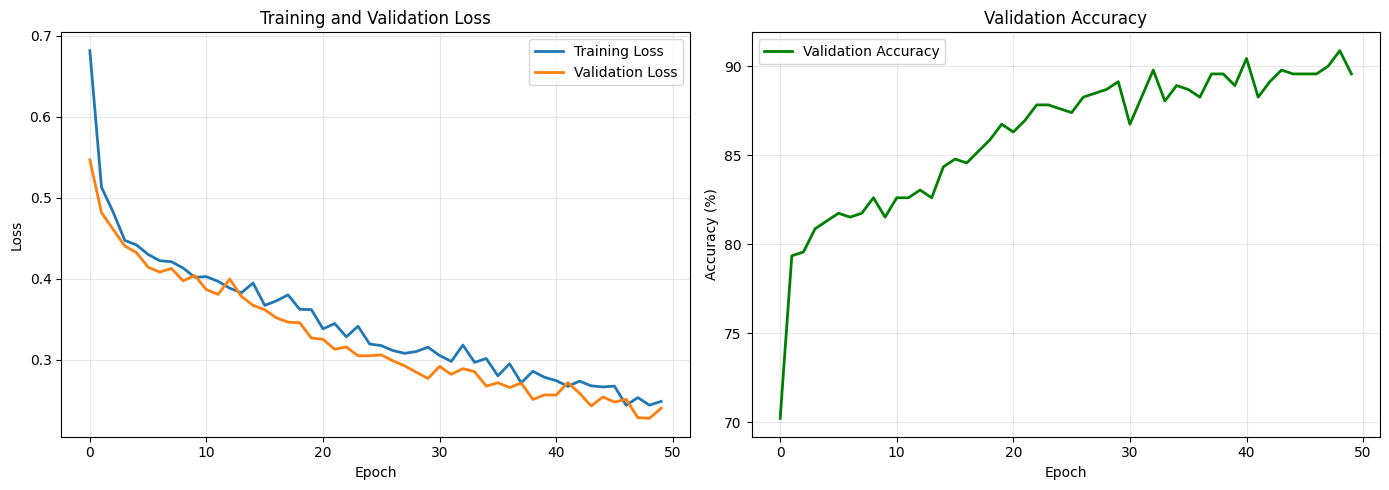

Final Training Loss: 0.2485
Final Validation Loss: 0.2401
Final Validation Accuracy: 89.57%


In [12]:
# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss curves
ax1.plot(train_losses, label='Training Loss', linewidth=2)
ax1.plot(val_losses, label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curve
ax2.plot(val_accuracies, label='Validation Accuracy', color='green', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Validation Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.2f}%")

## 📊 Milestone 5: Medical Evaluation Metrics (10 minutes)

**In medical diagnosis, accuracy is NOT enough!**

We need:
- **Sensitivity (Recall)** - How many actual diabetics did we catch?
- **Specificity** - How many non-diabetics did we correctly identify?
- **Precision** - Of those we diagnosed as diabetic, how many actually are?
- **F1-Score** - Harmonic mean of precision and recall

**Why this matters:**
- Missing a diabetic patient (False Negative) can be life-threatening
- Falsely diagnosing diabetes (False Positive) causes unnecessary treatment
- We need to balance these based on clinical priorities

In [14]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

# TODO: Set model to evaluation mode
# Hint: model.eval()
model.eval()

# Get predictions on test set
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        # TODO: Move to device

        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        # TODO: Get predictions
        # Hint: outputs = model(batch_X)
        #       _, predicted = torch.max(outputs, 1)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)


        # Store predictions and labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

# Convert to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# TODO: Compute metrics
# Hint: accuracy = accuracy_score(all_labels, all_predictions)
#       precision = precision_score(all_labels, all_predictions)
#       sensitivity = recall_score(all_labels, all_predictions)  # Sensitivity = Recall
#       f1 = f1_score(all_labels, all_predictions)

accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
sensitivity = recall_score(all_labels, all_predictions)  # Sensitivity = Recall
f1 = f1_score(all_labels, all_predictions)




# TODO: Compute specificity manually
# Hint: cm = confusion_matrix(all_labels, all_predictions)
#       tn, fp, fn, tp = cm.ravel()
#       specificity = tn / (tn + fp)

cm = confusion_matrix(all_labels, all_predictions)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)




# Print results
print("\n" + "="*50)
print("MEDICAL EVALUATION METRICS")
print("="*50)
print(f"Accuracy:    {accuracy*100:.2f}%")
print(f"Precision:   {precision*100:.2f}%  (Of predicted diabetic, how many are correct?)")
print(f"Sensitivity: {sensitivity*100:.2f}%  (Of actual diabetic, how many did we catch?)")
print(f"Specificity: {specificity*100:.2f}%  (Of actual non-diabetic, how many correct?)")
print(f"F1-Score:    {f1:.4f}")
print("="*50)

# Baseline comparison
p = np.mean(all_labels)
baseline_accuracy = np.max([p, 1 - p])
print(f"\nBaseline (always predict majority class): {baseline_accuracy*100:.2f}%")
print(f"Our model improvement: +{(accuracy - baseline_accuracy)*100:.2f}%")


MEDICAL EVALUATION METRICS
Accuracy:    89.57%
Precision:   90.07%  (Of predicted diabetic, how many are correct?)
Sensitivity: 78.88%  (Of actual diabetic, how many did we catch?)
Specificity: 95.32%  (Of actual non-diabetic, how many correct?)
F1-Score:    0.8411

Baseline (always predict majority class): 65.00%
Our model improvement: +24.57%


### 🎯 Confusion Matrix Visualization

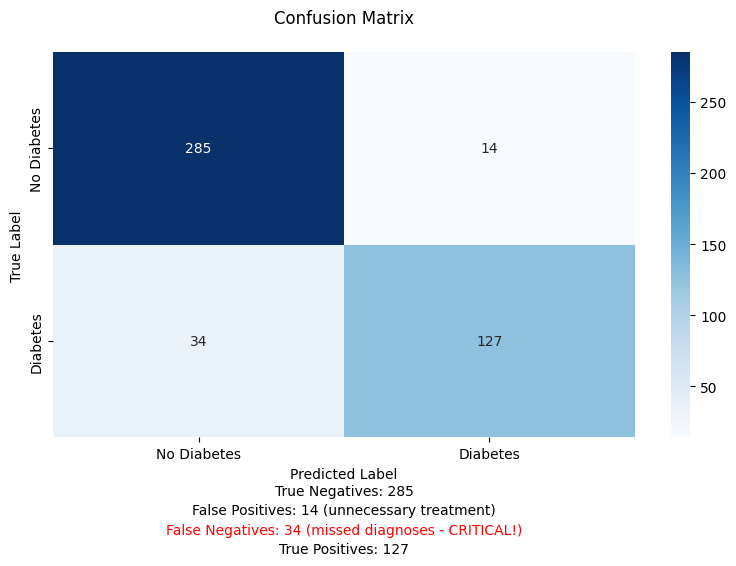


Clinical Interpretation:
- We correctly identified 127 diabetic patients
- We MISSED 34 diabetic patients (this is bad!)
- We falsely diagnosed 14 healthy patients (unnecessary worry/treatment)
- We correctly identified 285 healthy patients


In [15]:
# TODO: Create confusion matrix heatmap
# Hint: Use seaborn heatmap

plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix\n')

# Add interpretation
tn, fp, fn, tp = cm.ravel()
plt.text(0.5, -0.15, f"True Negatives: {tn}", transform=plt.gca().transAxes, ha='center')
plt.text(0.5, -0.20, f"False Positives: {fp} (unnecessary treatment)", transform=plt.gca().transAxes, ha='center')
plt.text(0.5, -0.25, f"False Negatives: {fn} (missed diagnoses - CRITICAL!)", transform=plt.gca().transAxes, ha='center', color='red')
plt.text(0.5, -0.30, f"True Positives: {tp}", transform=plt.gca().transAxes, ha='center')

plt.tight_layout()
plt.show()

print(f"\nClinical Interpretation:")
print(f"- We correctly identified {tp} diabetic patients")
print(f"- We MISSED {fn} diabetic patients (this is bad!)")
print(f"- We falsely diagnosed {fp} healthy patients (unnecessary worry/treatment)")
print(f"- We correctly identified {tn} healthy patients")

### 📋 Detailed Classification Report

In [16]:
# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(all_labels, all_predictions,
                          target_names=['No Diabetes', 'Diabetes']))


Detailed Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.89      0.95      0.92       299
    Diabetes       0.90      0.79      0.84       161

    accuracy                           0.90       460
   macro avg       0.90      0.87      0.88       460
weighted avg       0.90      0.90      0.89       460



## 🔬 Milestone 6: Experimentation & Optimization (Remaining time)

**Now it's YOUR turn to improve the model!**

Try different approaches and document what works:

### Ideas to Experiment With:

1. **Architecture Changes:**
   - More/fewer layers
   - Different layer sizes
   - Add dropout for regularization
   - Add batch normalization

2. **Training Changes:**
   - Different learning rates (0.0001, 0.01)
   - Different optimizers (SGD, RMSprop)
   - Different batch sizes (16, 64)
   - More/fewer epochs

3. **Data Changes:**
   - Different train/val/test splits
   - Different normalization
   - Handle class imbalance (weighted loss)

**Keep track of your experiments!**

### Experiment 1: Deeper Network

In [55]:
# TODO: Try a deeper network
# Example: 8 → 32 → 16 → 8 → 2

class DiabetesClassifier(nn.Module):
    def __init__(self):
        super(DiabetesClassifier, self).__init__()
        self.fc1 = nn.Linear(8, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

model = DiabetesClassifier().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
print(model)

train_losses = []
val_losses = []
val_accuracies = []

print("Starting training...\n")

for epoch in range(num_epochs):

    # TRAINING PHASE

    model.train()
    train_loss = 0.0

    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)


        optimizer.zero_grad()

        outputs = model(batch_X)

        loss = criterion(outputs, batch_y)

        loss.backward()

        optimizer.step()

        train_loss += loss.item()

    train_loss = train_loss / len(train_loader)



    # VALIDATION PHASE

    model.eval()

    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            outputs = model(batch_X)

            loss = criterion(outputs, batch_y)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print progress every 5 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"  Train Loss: {train_loss:.4f}")
        print(f"  Val Loss: {val_loss:.4f}")
        print(f"  Val Accuracy: {val_accuracy:.2f}%\n")
print("✓ Training Complete!")





from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

model.eval()

all_predictions = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
sensitivity = recall_score(all_labels, all_predictions)  # Sensitivity = Recall
f1 = f1_score(all_labels, all_predictions)

cm = confusion_matrix(all_labels, all_predictions)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print("\n" + "="*50)
print("MEDICAL EVALUATION METRICS")
print("="*50)
print(f"Accuracy:    {accuracy*100:.2f}%")
print(f"Precision:   {precision*100:.2f}%  (Of predicted diabetic, how many are correct?)")
print(f"Sensitivity: {sensitivity*100:.2f}%  (Of actual diabetic, how many did we catch?)")
print(f"Specificity: {specificity*100:.2f}%  (Of actual non-diabetic, how many correct?)")
print(f"F1-Score:    {f1:.4f}")
print("="*50)

# Baseline comparison
p = np.mean(all_labels)
baseline_accuracy = np.max([p, 1 - p])
print(f"\nBaseline (always predict majority class): {baseline_accuracy*100:.2f}%")
print(f"Our model improvement: +{(accuracy - baseline_accuracy)*100:.2f}%")

# Document results:
# Accuracy: 86.96
# Sensitivity: 96.27
# Better than original? Not really, the model predicted that a lot of people that are not diabetic, were. (lower precision)

DiabetesClassifier(
  (fc1): Linear(in_features=8, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=2, bias=True)
)
Starting training...

Epoch [10/50]
  Train Loss: 0.4194
  Val Loss: 0.3999
  Val Accuracy: 81.09%

Epoch [20/50]
  Train Loss: 0.3485
  Val Loss: 0.3234
  Val Accuracy: 85.00%

Epoch [30/50]
  Train Loss: 0.3025
  Val Loss: 0.2738
  Val Accuracy: 88.48%

Epoch [40/50]
  Train Loss: 0.3302
  Val Loss: 0.2800
  Val Accuracy: 85.87%

Epoch [50/50]
  Train Loss: 0.2345
  Val Loss: 0.2407
  Val Accuracy: 86.96%

✓ Training Complete!

MEDICAL EVALUATION METRICS
Accuracy:    86.96%
Precision:   74.16%  (Of predicted diabetic, how many are correct?)
Sensitivity: 96.27%  (Of actual diabetic, how many did we catch?)
Specificity: 81.94%  (Of actual non-diabetic, how many correct?)
F1-Score:    0.8378

Baseline (always predict

### Experiment 2: Add Dropout

In [56]:
# TODO: Add dropout layers (e.g., 0.2 or 0.5)
# Dropout helps prevent overfitting

class DropoutClassifier(nn.Module):
    def __init__(self):
        super(DropoutClassifier, self).__init__()
        # Add dropout: self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(8, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.dropout1 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(16, 8)
        self.dropout2 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.dropout1(x)
        x = self.fc3(x)
        x = self.dropout2(x)
        x = self.fc4(x)
        return x



model = DropoutClassifier().to(device)
print(model)
optimizer = optim.Adam(model.parameters(), lr=0.01)

train_losses = []
val_losses = []
val_accuracies = []

print("Starting training...\n")

for epoch in range(num_epochs):

    # TRAINING PHASE

    model.train()
    train_loss = 0.0

    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)


        optimizer.zero_grad()

        outputs = model(batch_X)

        loss = criterion(outputs, batch_y)

        loss.backward()

        optimizer.step()

        train_loss += loss.item()

    train_loss = train_loss / len(train_loader)



    # VALIDATION PHASE

    model.eval()

    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            outputs = model(batch_X)

            loss = criterion(outputs, batch_y)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print progress every 5 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"  Train Loss: {train_loss:.4f}")
        print(f"  Val Loss: {val_loss:.4f}")
        print(f"  Val Accuracy: {val_accuracy:.2f}%\n")
print("✓ Training Complete!")





from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

model.eval()

all_predictions = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
sensitivity = recall_score(all_labels, all_predictions)  # Sensitivity = Recall
f1 = f1_score(all_labels, all_predictions)

cm = confusion_matrix(all_labels, all_predictions)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print("\n" + "="*50)
print("MEDICAL EVALUATION METRICS")
print("="*50)
print(f"Accuracy:    {accuracy*100:.2f}%")
print(f"Precision:   {precision*100:.2f}%  (Of predicted diabetic, how many are correct?)")
print(f"Sensitivity: {sensitivity*100:.2f}%  (Of actual diabetic, how many did we catch?)")
print(f"Specificity: {specificity*100:.2f}%  (Of actual non-diabetic, how many correct?)")
print(f"F1-Score:    {f1:.4f}")
print("="*50)

# Baseline comparison
p = np.mean(all_labels)
baseline_accuracy = np.max([p, 1 - p])
print(f"\nBaseline (always predict majority class): {baseline_accuracy*100:.2f}%")
print(f"Our model improvement: +{(accuracy - baseline_accuracy)*100:.2f}%")


# Document results:
# Accuracy: 93.04
# Did it reduce overfitting? It did!

DropoutClassifier(
  (fc1): Linear(in_features=8, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=8, out_features=2, bias=True)
)
Starting training...

Epoch [10/50]
  Train Loss: 0.4327
  Val Loss: 0.4090
  Val Accuracy: 83.04%

Epoch [20/50]
  Train Loss: 0.3583
  Val Loss: 0.3233
  Val Accuracy: 85.22%

Epoch [30/50]
  Train Loss: 0.3464
  Val Loss: 0.2970
  Val Accuracy: 85.43%

Epoch [40/50]
  Train Loss: 0.2851
  Val Loss: 0.2597
  Val Accuracy: 86.96%

Epoch [50/50]
  Train Loss: 0.2664
  Val Loss: 0.2025
  Val Accuracy: 93.04%

✓ Training Complete!

MEDICAL EVALUATION METRICS
Accuracy:    93.04%
Precision:   87.72%  (Of predicted diabetic, how many are correct?)
Sensitivity: 93.17%  (Of actual diabetic, how many did we catch?)
Specificity: 92.98%  (O

### Experiment 3: Different Learning Rate

Epoch [1/50]
  Train Loss: 0.6661
  Val Loss: 0.6026
  Val Accuracy: 70.87%

Epoch [2/50]
  Train Loss: 0.5709
  Val Loss: 0.5002
  Val Accuracy: 75.65%

Epoch [3/50]
  Train Loss: 0.5348
  Val Loss: 0.4831
  Val Accuracy: 76.30%

Epoch [4/50]
  Train Loss: 0.5280
  Val Loss: 0.4946
  Val Accuracy: 79.13%

Epoch [5/50]
  Train Loss: 0.4856
  Val Loss: 0.4558
  Val Accuracy: 76.96%

Epoch [6/50]
  Train Loss: 0.4781
  Val Loss: 0.4669
  Val Accuracy: 78.26%

Epoch [7/50]
  Train Loss: 0.4721
  Val Loss: 0.4560
  Val Accuracy: 78.48%

Epoch [8/50]
  Train Loss: 0.4599
  Val Loss: 0.4622
  Val Accuracy: 79.13%

Epoch [9/50]
  Train Loss: 0.4523
  Val Loss: 0.4549
  Val Accuracy: 79.35%

Epoch [10/50]
  Train Loss: 0.4492
  Val Loss: 0.4398
  Val Accuracy: 80.00%

Epoch [11/50]
  Train Loss: 0.4451
  Val Loss: 0.4267
  Val Accuracy: 80.43%

Epoch [12/50]
  Train Loss: 0.4567
  Val Loss: 0.4415
  Val Accuracy: 81.09%

Epoch [13/50]
  Train Loss: 0.4455
  Val Loss: 0.4292
  Val Accuracy: 81.

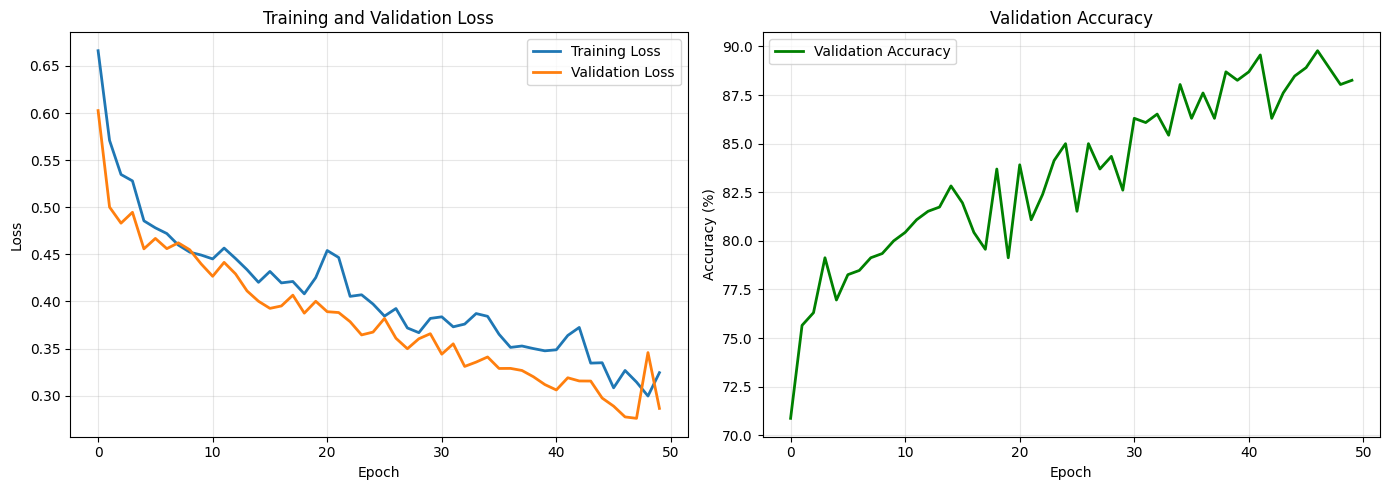

Final Training Loss: 0.3244
Final Validation Loss: 0.2865
Final Validation Accuracy: 88.26%


In [57]:
# TODO: Try lr=0.0001 (lower) or lr=0.01 (higher)

# optimizer = optim.Adam(model.parameters(), lr=0.0001)

# TODO: Add dropout layers (e.g., 0.2 or 0.5)
# Dropout helps prevent overfitting

class DropoutClassifier(nn.Module):
    def __init__(self):
        super(DropoutClassifier, self).__init__()
        # Add dropout: self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(8, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.dropout1 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(16, 8)
        self.dropout2 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.dropout1(x)
        x = self.fc3(x)
        x = self.dropout2(x)
        x = self.fc4(x)
        return x


model = DropoutClassifier().to(device)

train_losses = []
val_losses = []
val_accuracies = []

optimizer = optim.Adam(model.parameters(), lr=0.005)

for epoch in range(num_epochs):

    # TRAINING PHASE

    model.train()
    train_loss = 0.0

    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)


        optimizer.zero_grad()

        outputs = model(batch_X)

        loss = criterion(outputs, batch_y)

        loss.backward()

        optimizer.step()

        train_loss += loss.item()

    train_loss = train_loss / len(train_loader)



    # VALIDATION PHASE

    model.eval()

    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            outputs = model(batch_X)

            loss = criterion(outputs, batch_y)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print progress every 5 epochs
    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"  Train Loss: {train_loss:.4f}")
        print(f"  Val Loss: {val_loss:.4f}")
        print(f"  Val Accuracy: {val_accuracy:.2f}%\n")
print("✓ Training Complete!")





from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

model.eval()

all_predictions = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
sensitivity = recall_score(all_labels, all_predictions)  # Sensitivity = Recall
f1 = f1_score(all_labels, all_predictions)

cm = confusion_matrix(all_labels, all_predictions)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print("\n" + "="*50)
print("MEDICAL EVALUATION METRICS")
print("="*50)
print(f"Accuracy:    {accuracy*100:.2f}%")
print(f"Precision:   {precision*100:.2f}%  (Of predicted diabetic, how many are correct?)")
print(f"Sensitivity: {sensitivity*100:.2f}%  (Of actual diabetic, how many did we catch?)")
print(f"Specificity: {specificity*100:.2f}%  (Of actual non-diabetic, how many correct?)")
print(f"F1-Score:    {f1:.4f}")
print("="*50)

# Baseline comparison
p = np.mean(all_labels)
baseline_accuracy = np.max([p, 1 - p])
print(f"\nBaseline (always predict majority class): {baseline_accuracy*100:.2f}%")
print(f"Our model improvement: +{(accuracy - baseline_accuracy)*100:.2f}%")



# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss curves
ax1.plot(train_losses, label='Training Loss', linewidth=2)
ax1.plot(val_losses, label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curve
ax2.plot(val_accuracies, label='Validation Accuracy', color='green', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Validation Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.2f}%")

# Document results:
# Learning rate: 0.005
# Convergence speed: The more I lowered the lr, it usually got slower
# Final accuracy: 88.26

### Experiment 4: Class Imbalance Handling

Epoch [5/50]
  Train Loss: 0.4778
  Val Loss: 0.4621
  Val Accuracy: 78.26%

Epoch [10/50]
  Train Loss: 0.4564
  Val Loss: 0.4136
  Val Accuracy: 80.65%

Epoch [15/50]
  Train Loss: 0.4052
  Val Loss: 0.3664
  Val Accuracy: 83.48%

Epoch [20/50]
  Train Loss: 0.3776
  Val Loss: 0.3399
  Val Accuracy: 85.87%

Epoch [25/50]
  Train Loss: 0.3530
  Val Loss: 0.2963
  Val Accuracy: 87.39%

Epoch [30/50]
  Train Loss: 0.3114
  Val Loss: 0.2537
  Val Accuracy: 90.43%

Epoch [35/50]
  Train Loss: 0.2648
  Val Loss: 0.2373
  Val Accuracy: 90.65%

Epoch [40/50]
  Train Loss: 0.2458
  Val Loss: 0.2233
  Val Accuracy: 91.96%

Epoch [45/50]
  Train Loss: 0.2317
  Val Loss: 0.1923
  Val Accuracy: 91.52%

Epoch [50/50]
  Train Loss: 0.2294
  Val Loss: 0.1557
  Val Accuracy: 93.91%

✓ Training Complete!

MEDICAL EVALUATION METRICS
Accuracy:    93.91%
Precision:   87.57%  (Of predicted diabetic, how many are correct?)
Sensitivity: 96.27%  (Of actual diabetic, how many did we catch?)
Specificity: 92.64

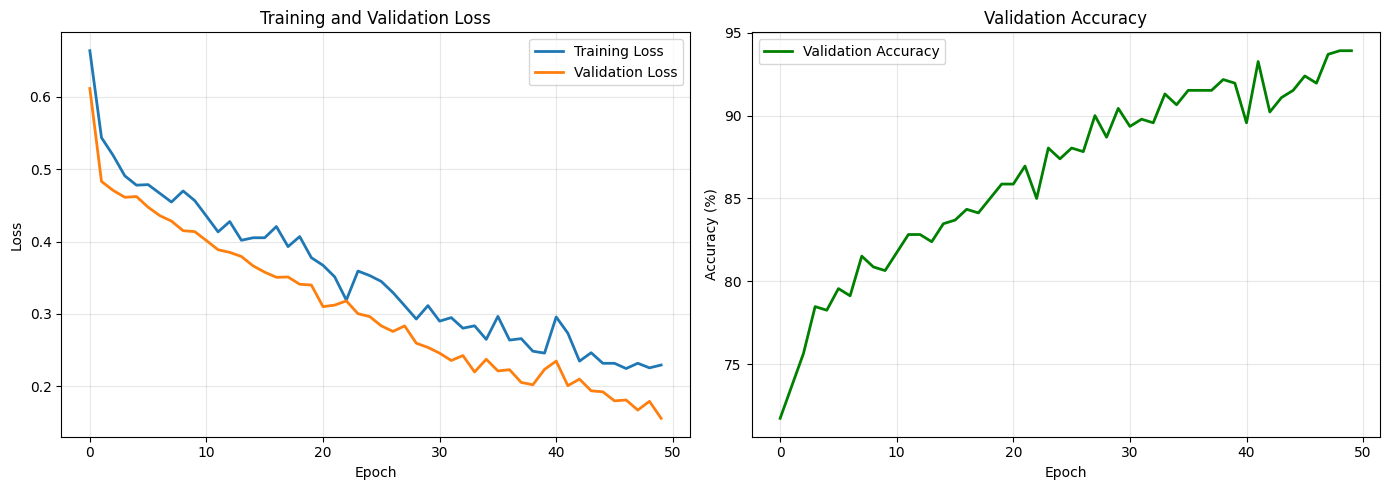

Final Training Loss: 0.2294
Final Validation Loss: 0.1557
Final Validation Accuracy: 93.91%


In [58]:
# TODO: Use weighted loss to handle class imbalance
# Medical datasets often have imbalanced classes

# Calculate class weights
# class_counts = np.bincount(y_train)
# class_weights = 1. / class_counts
# weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
# criterion = nn.CrossEntropyLoss(weight=weights)
# TODO: Try lr=0.0001 (lower) or lr=0.01 (higher)

# optimizer = optim.Adam(model.parameters(), lr=0.0001)


class DropoutClassifier(nn.Module):
    def __init__(self):
        super(DropoutClassifier, self).__init__()
        self.fc1 = nn.Linear(8, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.dropout = nn.Dropout(0.2)
        self.fc3 = nn.Linear(16, 8)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.dropout(x)
        x = self.fc4(x)
        return x


model = DropoutClassifier().to(device)

train_losses = []
val_losses = []
val_accuracies = []

optimizer = optim.Adam(model.parameters(), lr=0.005)
class_counts = np.bincount(y_train)
class_weights = 1. / class_counts
weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)


for epoch in range(num_epochs):

    # TRAINING PHASE

    model.train()
    train_loss = 0.0

    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)


        optimizer.zero_grad()

        outputs = model(batch_X)

        loss = criterion(outputs, batch_y)

        loss.backward()

        optimizer.step()

        train_loss += loss.item()

    train_loss = train_loss / len(train_loader)



    # VALIDATION PHASE

    model.eval()

    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            outputs = model(batch_X)

            loss = criterion(outputs, batch_y)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print progress every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"  Train Loss: {train_loss:.4f}")
        print(f"  Val Loss: {val_loss:.4f}")
        print(f"  Val Accuracy: {val_accuracy:.2f}%\n")
print("✓ Training Complete!")





from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

model.eval()

all_predictions = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
sensitivity = recall_score(all_labels, all_predictions)  # Sensitivity = Recall
f1 = f1_score(all_labels, all_predictions)

cm = confusion_matrix(all_labels, all_predictions)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print("\n" + "="*50)
print("MEDICAL EVALUATION METRICS")
print("="*50)
print(f"Accuracy:    {accuracy*100:.2f}%")
print(f"Precision:   {precision*100:.2f}%  (Of predicted diabetic, how many are correct?)")
print(f"Sensitivity: {sensitivity*100:.2f}%  (Of actual diabetic, how many did we catch?)")
print(f"Specificity: {specificity*100:.2f}%  (Of actual non-diabetic, how many correct?)")
print(f"F1-Score:    {f1:.4f}")
print("="*50)

# Baseline comparison
p = np.mean(all_labels)
baseline_accuracy = np.max([p, 1 - p])
print(f"\nBaseline (always predict majority class): {baseline_accuracy*100:.2f}%")
print(f"Our model improvement: +{(accuracy - baseline_accuracy)*100:.2f}%")



# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss curves
ax1.plot(train_losses, label='Training Loss', linewidth=2)
ax1.plot(val_losses, label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curve
ax2.plot(val_accuracies, label='Validation Accuracy', color='green', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Validation Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.2f}%")

# Document results:
# Did sensitivity improve? It did, from 91 to 96 (without affecting the other metrics too much!)

### 📊 Experiment Comparison Table

In [60]:
# TODO: Create a comparison table of all your experiments

results = {
    'Experiment': ['Baseline', 'Deeper', 'Dropout', 'Low LR', 'Weighted Loss'],
    'Accuracy': [89.57, 86.96, 93.04, 88.26, 93.91],
    'Sensitivity': [78.88, 96.27, 93.17, 91.30, 96.27],
    'Specificity': [95.32, 81.94, 92.98, 86.62, 92.64],
    'F1-Score': [0.8411, 0.8378, 0.9036, 0.8448, 0.9172]
}

results_df = pd.DataFrame(results)
print(results_df)

# Which experiment performed best?
# Your analysis: Weighted loss. It performed better in almos every single metric!

      Experiment  Accuracy  Sensitivity  Specificity  F1-Score
0       Baseline     89.57        78.88        95.32    0.8411
1         Deeper     86.96        96.27        81.94    0.8378
2        Dropout     93.04        93.17        92.98    0.9036
3         Low LR     88.26        91.30        86.62    0.8448
4  Weighted Loss     93.91        96.27        92.64    0.9172


---

## 🎓 Reflection Questions

Answer these questions based on your experiments:

1. **What was the biggest challenge in building the neural network?**
   - Your answer: Understanding the details that had to be taken into consideration for it to perform better.

2. **Which component of the training loop did you find most confusing initially?**
   - Your answer: How the loss was generally handled

3. **Why is sensitivity (recall) particularly important for medical diagnosis?**
   - Your answer: Because saying a patient doesn't have a disease that they do acctually have is very misleading and can make it so that they don't treat it soon enough and it ends up getting worse.

4. **What was your best performing model configuration?**
   - Your answer: The weighted loss with two dropout layers and lr of 0.005

5. **If you were deploying this in a real hospital, what additional considerations would you have?**
   - Your answer:  Data treatment for consistency, risk tolerance, privacy, data security and others.

---

## 🎉 Lab 2 Complete!

### What You Accomplished:

✅ Mastered PyTorch tensor operations  
✅ Built a complete neural network from scratch  
✅ Implemented the full training loop  
✅ Evaluated with medical metrics  
✅ Experimented with improvements  

### Key Takeaways:

- **The training loop is fundamental** - forward, loss, backward, optimize
- **Medical metrics matter** - accuracy alone is insufficient
- **Experimentation is essential** - no "perfect" hyperparameters
- **Neural networks are powerful** but require careful tuning

**Good work! 🎓✨**